# Comprehensive Analysis and Modeling of Amazon Customer Reviews

**Project Overview:**
This notebook presents an end-to-end data science project focused on sentiment analysis of Amazon customer reviews. Starting with raw review data, we perform thorough preprocessing and cleaning, followed by feature engineering. Subsequently, a diverse suite of machine learning classification models is trained, evaluated, and compared to identify the most effective approach for discerning sentiment from the review text.

**Dataset Used:**
The analysis is conducted on an Amazon product review dataset (specifically, the `7817_1.csv` file seems to be the primary source). This dataset contains customer-generated text, including review bodies and titles, alongside other potential metadata that could be indicative of sentiment or product ratings.

**Workflow and Methodology:**
The notebook follows a structured approach:

1.  **Initial Setup and Data Loading:**
    * Importing necessary Python libraries for data manipulation, text processing, machine learning, and visualization.
    * Loading the Amazon review dataset into a pandas DataFrame.
    * Conducting an initial inspection of the data to understand its structure, identify column names (e.g., `reviews.text`, `reviews.title`, and the target variable for sentiment/rating), check for missing values, and assess data types.

2.  **Extensive Text Preprocessing:**
    * Defining and applying a series of text cleaning functions to standardize the review text. This includes:
        * Conversion to lowercase.
        * Removal of URLs, user handles (@mentions), and markdown-style links.
        * Elimination of punctuation and special characters.
    * Tokenizing the cleaned text into individual words.
    * Removing common English stop words.
    * Applying Porter stemming to reduce words to their root form.

3.  **Feature Engineering:**
    * Transforming the preprocessed textual data (stemmed reviews without stop words) into a numerical format suitable for machine learning models. This typically involves techniques like TF-IDF (Term Frequency-Inverse Document Frequency) to create feature vectors.
    * Preparing the data by splitting it into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`).
    * Converting feature matrices to dense arrays where required by specific models (e.g., for `GaussianNB`).

4.  **Machine Learning Model Training and Comparative Evaluation:**
    * Initializing a comprehensive list of classification models, including: `GaussianNB`, `DecisionTreeClassifier`, `KNeighborsClassifier`, `RandomForestClassifier`, `LogisticRegression`, `AdaBoostClassifier`, `GradientBoostingClassifier`, `XGBClassifier`, `LGBMClassifier`, and `CatBoostClassifier`. (Note: GPU-specific parameters for XGBoost, LightGBM, and CatBoost have been adjusted for CPU execution in this environment).
    * Iteratively training each model on the training data.
    * Evaluating each model's performance on both training and testing sets using metrics such as:
        * Accuracy.
    * For models that support it, probability predictions are generated to calculate and plot multiclass ROC curves and AUC scores, providing a more nuanced view of classification performance across different thresholds.
    * The notebook aims to identify the best-performing model based on these metrics, with a final summary highlighting key insights (as indicated by the concluding markdown cell in the notebook focusing on GradientBoostingClassifier's superior performance).

This systematic approach allows for a robust comparison of different classification strategies and provides a clear indication of the most suitable models for this particular Amazon review sentiment analysis task.

In [46]:
# Installing packages
!pip install watermark
!pip install vaderSentiment
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [47]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools
from datasets import Dataset

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# ML NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

### Download the necessary resources from nltk (tokenizers and stopwords corpus)
# Punkt tokenizer for word tokenization
nltk.download('punkt')

nltk.download('punkt_tab')

# Stopwords list in multiple languages
nltk.download('stopwords')

nltk.download('wordnet')
nltk.download('omw-1.4', quiet=True) # Adesea necesar pentru WordNetLemmatizer în versiuni mai noi de NLTK
print("Downloaded NLTK resources.")

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Downloaded NLTK resources.
Python version in this Jupyter Notebook: 3.9.22
Author: Library versions

re            : 2.2.1
matplotlib    : 3.9.4
lightgbm      : 4.6.0
plotly        : 6.1.1
vaderSentiment: 3.3.2
nltk          : 3.9.1
wordcloud     : 1.9.4
datasets      : 3.6.0
numpy         : 2.0.2
seaborn       : 0.13.2
watermark     : 2.5.0
catboost      : 1.2.8
sklearn       : 1.6.1
platform      : 1.0.8
pandas        : 2.2.3
xgboost       : 2.1.4



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Part 2 - Database

In [48]:
# Database
pd.set_option('display.max_columns', None)
df = pd.read_csv("/app/amazon_product_reviews/7817_1.csv")

# Viewing dataset
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,NaN,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,NaN,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,NaN,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,NaN,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,NaN,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [49]:
# Remove columns that have any NaN value
# df = df.dropna(axis=1)

# Check remaining columns after removal
print("Remaining columns after removing columns with NaN:")
print(df.isnull().sum())

Remaining columns after removing columns with NaN:
id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [50]:
# Calculate the total number of rows and the number of missing values in the 'Translated_Review' column.
# Then, print the percentage of missing values in the 'Translated_Review' column.
total_rows = len(df)
missing_translated_review = df['reviews.title'].isnull().sum()
print(f"Percentage of missing Translated_Review: {(missing_translated_review/total_rows)*100:.2f}%")

Percentage of missing Translated_Review: 1.06%


In [51]:
# Drop rows that have missing values in the 'Translated_Review' or 'Sentiment' columns
#df = df.dropna(subset=['reviews.title'])

# Print the count of missing values for each column after dropping the rows with missing data
#print(df.isnull().sum())
#print()

# Display the DataFrame
#df

# Part 4 - Text Preprocessing

In [52]:
%%time

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

### Download the necessary resources from nltk (tokenizers and stopwords corpus)
# Punkt tokenizer for word tokenization
nltk.download('punkt')
 
# Stopwords list in multiple languages
nltk.download('stopwords')   

# Initialize the Porter stemmer and load English stopwords
stemmer = PorterStemmer()

# Create a set of English stopwords for efficient lookup
stop_words = set(stopwords.words('english'))  

# Function to clean the text by removing URLs, handles, and punctuation
def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove URLs (http, https, and www links)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove markdown-style links [text](link)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        # Remove handles (@username mentions)
        text = re.sub(r'@\w+', '', text)

        # Remove punctuation and special characters
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

# Function to tokenize the text into individual words
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# Function to remove stopwords from the tokenized text
def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

# Function to apply stemming to the tokens
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

### Apply the functions to the DataFrame
# Clean the text
df['Cleaned_Review'] = df['reviews.text'].apply(clean_text)

# Tokenize the cleaned text
df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_text)

# Apply stemming to the tokenized words
df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)  

# Remove stopwords from the tokenized text
df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)

# Display the first few rows of the DataFrame to visualize the dataset
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 5.4 s, sys: 22.8 ms, total: 5.42 s
Wall time: 8.32 s


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,NaN,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy..."
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,NaN,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read..."
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,NaN,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire..."
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,NaN,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con..."
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,NaN,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti..."


Here, we performed text preprocessing, which included several important steps. First, we carried out **text cleaning**, removing special characters such as punctuation, symbols, and irrelevant numbers to ensure that the model would not be influenced by noise. Additionally, we standardized the text by applying techniques such as converting to lowercase and removing extra spaces.

The second part of the preprocessing involved **text tokenization**, where the content was segmented into individual words (tokens). This step is crucial for further analysis, allowing each word to be handled separately rather than treating the text as a single block. Tokenization also facilitates the conversion of words into numerical representations, a necessary step for training machine learning and deep learning models.

# Part 4.1 - Sentiment Analysis with Vader

In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer, which is part of the VADER sentiment analysis tool.
analyzer = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis to each review.
# The function takes in a 'review' (text) and returns the polarity scores, which include
# 'compound', 'positive', 'negative', and 'neutral' sentiment values.
def get_sentiment(review):
    return analyzer.polarity_scores(review)

# Apply the 'get_sentiment' function to each entry in the 'Cleaned_Review' column.
# Store the resulting sentiment scores (dictionary) in a new column 'vader_scores'.
df['vader_scores'] = df['Cleaned_Review'].apply(get_sentiment)

# Extract the 'compound' score from the 'vader_scores' dictionary for each review.
# The 'compound' score is a normalized score ranging from -1 (most negative) to +1 (most positive),
# summarizing the overall sentiment of the text.
df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Function to classify the sentiment based on the 'compound' score.
# Scores >= 0.05 are classified as 'Positive', <= -0.05 as 'Negative', and anything in between as 'Neutral'.
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the 'classify_sentiment' function to the 'compound' score to get the overall sentiment
# classification (Positive, Negative, or Neutral) for each review.
df['sentiment'] = df['compound'].apply(classify_sentiment)

# Display the first few rows of the DataFrame, showing the cleaned review text,
# the 'compound' sentiment score, and the classified 'sentiment'.
print(df[['Cleaned_Review', 'compound', 'sentiment']].head(10))

                                      Cleaned_Review  compound sentiment
0  i initially had trouble deciding between the p...    0.9879  Positive
1  allow me to preface this with a little history...    0.9881  Positive
2  i am enjoying it so far great for reading had ...    0.4364  Positive
3  i bought one of the first paperwhites and have...    0.9746  Positive
4  i have to say upfront  i dont like coroporate ...    0.9980  Positive
5  my previous kindle was a dx this is my second ...    0.2627  Positive
6  allow me to preface this with a little history...    0.9881  Positive
7  just got mine right now looks the same as the ...    0.9205  Positive
8  i initially had trouble deciding between the p...    0.9879  Positive
9  i am enjoying it so far great for reading had ...    0.4364  Positive


In this script, we apply the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to classify the sentiment of textual reviews. VADER is a popular rule-based model used to analyze the sentiment expressed in text, specifically designed to handle social media, but applicable to any type of textual data.

- **Sentiment Analysis with VADER**: We start by initializing an instance of `SentimentIntensityAnalyzer`, which computes the polarity of a given text. VADER calculates four sentiment scores for each review: `positive`, `negative`, `neutral`, and a `compound` score. The `compound` score represents an overall sentiment, normalized between -1 (extremely negative) to +1 (extremely positive).

- **Extracting the Compound Score**: After applying VADER to each review in the `Cleaned_Review` column, we store the results in a new column `vader_scores`. From this dictionary, we specifically extract the `compound` score, which simplifies the task of classifying the overall sentiment into 'Positive', 'Negative', or 'Neutral' based on defined thresholds.

- **Classifying Sentiments**: The `classify_sentiment` function uses the `compound` score to categorize the sentiment. A score greater than or equal to 0.05 indicates a positive sentiment, a score less than or equal to -0.05 indicates a negative sentiment, and anything in between is considered neutral. This classification helps in understanding the emotional tone conveyed in the review text.

- **Final Output**: After applying the sentiment classification, the DataFrame now contains columns for the original cleaned review text, the `compound` score, and the final `sentiment` label. This allows for easy interpretation of both the numerical sentiment scores and their respective categories (Positive, Neutral, or Negative). We then display the first few entries to visualize the results.

Overall, this script demonstrates a simple and effective way to perform sentiment analysis on text data using VADER, allowing for automated categorization of emotional tone in customer reviews, feedback, or any other form of written text."

# Part 5 - Exploratory data analysis

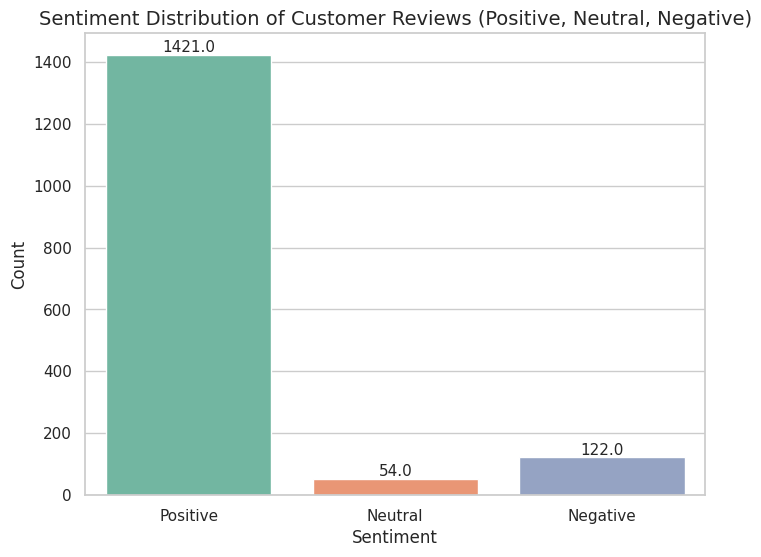

In [54]:
# Assuming df is already loaded and contains the 'sentiment' column
plt.figure(figsize=(8, 6))

# Count plot with a specific color palette
sns.countplot(data=df, x='sentiment', palette='Set2')

# Add title and axis labels with adjusted font sizes
plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=11)

# Display the plot
plt.show()

**Analysis** 

1. **Positive Sentiment Dominance**: - The overwhelming majority of reviews are classified as **Positive**. This suggests that customers are generally satisfied or expressing favorable opinions in the reviews.

2. **Neutral Sentiment**: - There is a significantly lower number of reviews classified as **Neutral**. This means that few reviews are neither strongly positive nor negative, showing a lack of middle-ground feedback.

3. **Negative Sentiment**: - A small portion of reviews is classified as **Negative**. While fewer than positive reviews, this indicates that some customers are sharing dissatisfaction or negative experiences.

4. **Visual Representation**: - The **bar plot** clearly highlights the disproportionate distribution of sentiments, where **positive reviews far outnumber** both negative and neutral sentiments.

5. **Improvements in Balance**: - If the dataset aims to represent a balanced sentiment analysis, it might be necessary to gather or balance more negative or neutral reviews to avoid the positive sentiment dominance. Alternatively, such an imbalance could be a reflection of a generally positive customer experience.

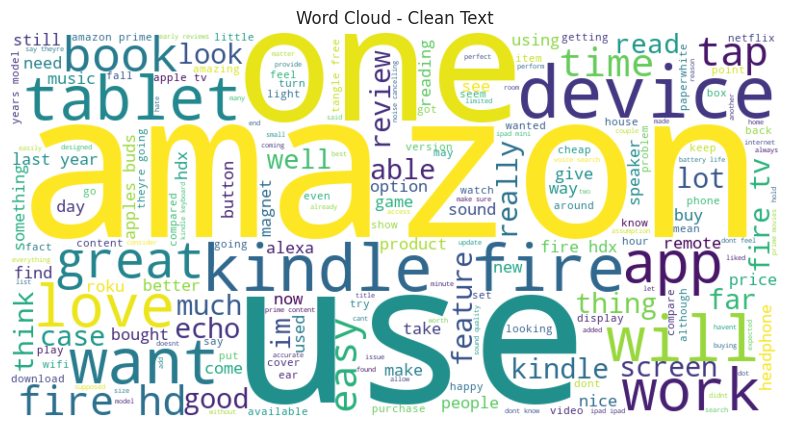

In [55]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, 
                      background_color='white').generate(' '.join(df['Cleaned_Review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Clean Text")
plt.show()

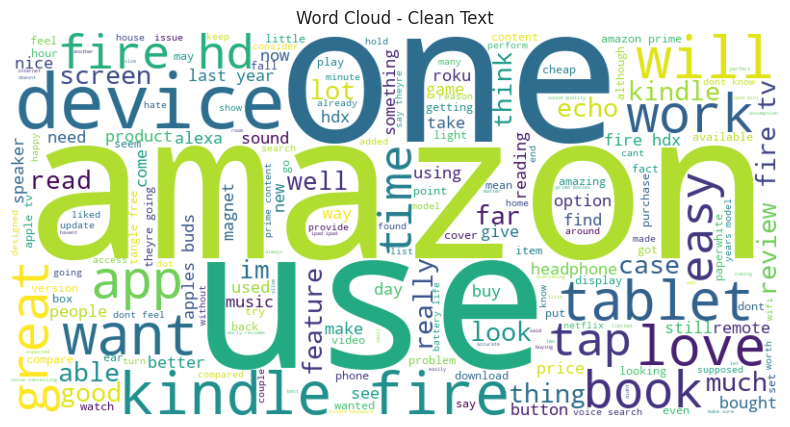

In [56]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, 
                      background_color='white').generate(' '.join(df['Cleaned_Review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Clean Text")
plt.show()

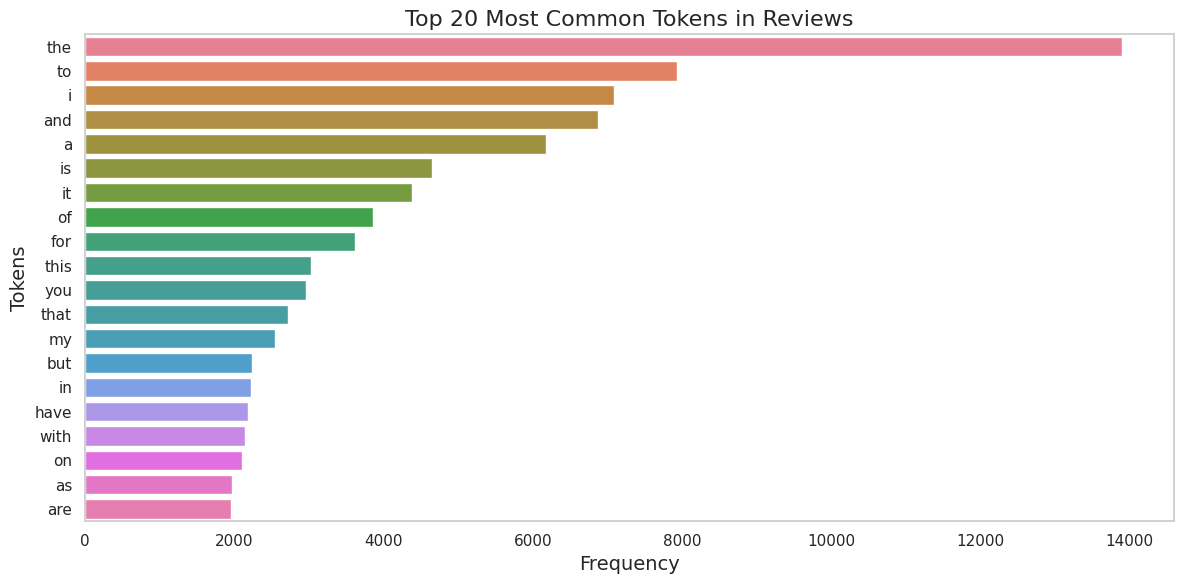

In [57]:
from collections import Counter

# Combine all tokens into a single list
all_tokens = [token for tokens in df['Tokenized_Review'] for token in tokens]

# Count the frequency of tokens
token_counts = Counter(all_tokens)

# Get the top 20 most common tokens
common_tokens = token_counts.most_common(20)  # Limiting to top 20

# Separate tokens and their frequencies
tokens, frequencies = zip(*common_tokens)

# Create a bar plot for the most frequent tokens
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(tokens), palette='husl')  # Changed palette

# Improved title and axis labels
plt.title('Top 20 Most Common Tokens in Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Tokens', fontsize=14)

# Add gridlines for easier reading of bar heights
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Ensure layout is clean and labels fit well
plt.grid(False)
plt.show()

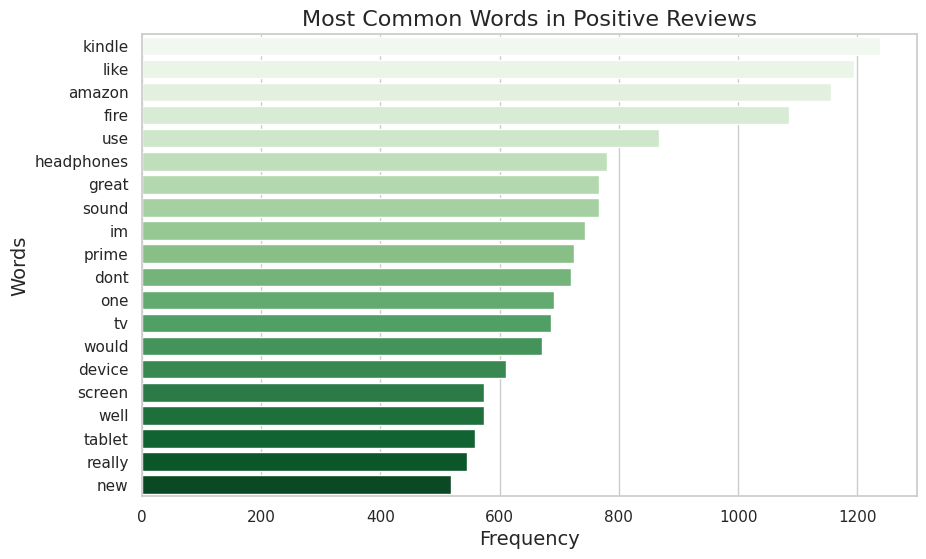

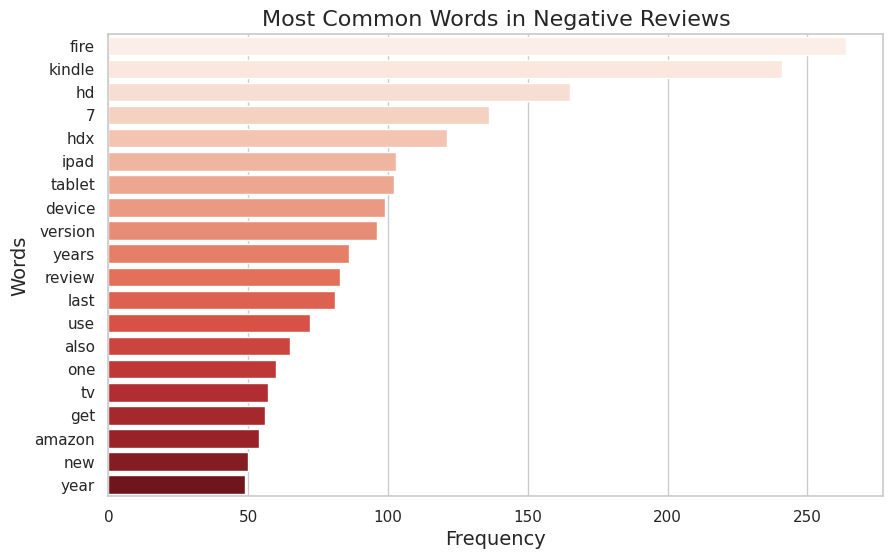

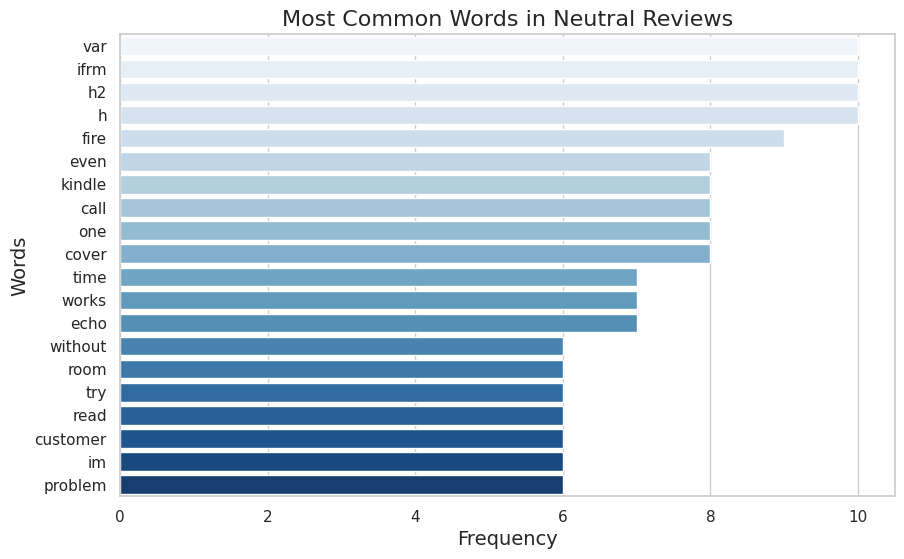

In [58]:
from collections import Counter

# Function to plot the most common words for each sentiment
def plot_most_common_words(common_words, sentiment, color):
    # Unzip the common_words tuple into two lists: words and their respective counts
    words, counts = zip(*common_words)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette=color)
    
    # Set the title and axis labels
    plt.title(f'Most Common Words in {sentiment} Reviews', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    
    # Display the chart
    plt.show()

# Generate the most common words for each sentiment

# Filter reviews based on sentiment
positive_reviews = df[df['sentiment'] == 'Positive']['No_Stopwords_Review']
negative_reviews = df[df['sentiment'] == 'Negative']['No_Stopwords_Review']
neutral_reviews = df[df['sentiment'] == 'Neutral']['No_Stopwords_Review']

# Combine all words into a single list for each sentiment
positive_words_list = [word for review in positive_reviews for word in review]
negative_words_list = [word for review in negative_reviews for word in review]
neutral_words_list = [word for review in neutral_reviews for word in review]

# Count the most common words in each sentiment's word list
positive_words = Counter(positive_words_list).most_common(20)
negative_words = Counter(negative_words_list).most_common(20)
neutral_words = Counter(neutral_words_list).most_common(20)

# Plot the most common words for Positive sentiment
plot_most_common_words(positive_words, 'Positive', 'Greens')

# Plot the most common words for Negative sentiment
plot_most_common_words(negative_words, 'Negative', 'Reds')

# Plot the most common words for Neutral sentiment
plot_most_common_words(neutral_words, 'Neutral', 'Blues')

# Part 6 - Target column split and test

In [59]:
# Deleting unwanted columns
df = df.drop(columns=['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'keys', 'name', 'prices', 'vader_scores', 'reviews.sourceURLs'])

# Displaying the first few rows of the dataframe to verify
df.head()

,colors,dimension,ean,manufacturer,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review,compound,sentiment
0,NaN,169 mm x 117 mm x 9.1 mm,NaN,Amazon,NaN,2015-08-08T00:00:00.000Z,NaN,139.0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy...",0.9879,Positive
1,NaN,169 mm x 117 mm x 9.1 mm,NaN,Amazon,NaN,2015-09-01T00:00:00.000Z,NaN,126.0,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read...",0.9881,Positive
2,NaN,169 mm x 117 mm x 9.1 mm,NaN,Amazon,NaN,2015-07-20T00:00:00.000Z,NaN,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire...",0.4364,Positive
3,NaN,169 mm x 117 mm x 9.1 mm,NaN,Amazon,NaN,2017-06-16T00:00:00.000Z,NaN,2.0,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con...",0.9746,Positive
4,NaN,169 mm x 117 mm x 9.1 mm,NaN,Amazon,NaN,2016-08-11T00:00:00.000Z,NaN,17.0,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti...",0.9980,Positive


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features

# Training and testing division
X = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])
y = df['sentiment']

tfidf_vectorizer

TfidfVectorizer(max_features=5000)

The **TfidfVectorizer** is used to convert the textual data into numerical features suitable for machine learning models. Specifically, TF-IDF (Term Frequency-Inverse Document Frequency) helps quantify the importance of each word in a document relative to a corpus of documents. Here’s why it’s being used:

### 1. **Convert Text to Numeric Format**:
   - Machine learning models work with numerical data, not raw text. The `TfidfVectorizer` transforms the cleaned text data (in this case, the `Cleaned_Review` column) into a **sparse matrix of numerical features**. Each word in the reviews becomes a feature that can be used by the model for classification.

### 2. **Capturing Importance of Words**:
   - The TF-IDF mechanism works by considering both the **frequency of a word in a document (Term Frequency, or TF)** and **how unique that word is across the entire set of documents (Inverse Document Frequency, or IDF)**. This way, commonly used words like "the" or "and" (which don't carry much meaning in sentiment analysis) get lower scores, while more important, topic-specific words receive higher scores.

### 3. **Avoiding Overfitting to Common Words**:
   - By using TF-IDF instead of simple word counts, you prevent the model from giving too much importance to frequently occurring but **less meaningful words** (like "the" or "is"). Instead, words that appear in fewer documents but have more significance (like "excellent" or "bad") are given higher weights.

### 4. **Reducing Dimensionality**:
   - The parameter `max_features=5000` limits the vectorizer to the top 5,000 most important words (features). This prevents the model from being overwhelmed by too many features, especially if there are many unique words across the reviews, which helps reduce **computational cost** and potentially improves model performance.

### 5. **Better Representation for Sentiment Analysis**:
   - In sentiment analysis, certain words carry more weight in determining whether a review is positive, negative, or neutral. The **TF-IDF approach** captures this and allows your model to learn the relationships between words and sentiment categories more effectively than simple bag-of-words approaches.

### 6. **Sparse Representation**:
   - The resulting `X` is a **sparse matrix**, meaning that only non-zero values (relevant words) are stored, which saves memory and speeds up the computation, especially in large datasets where many words do not appear in every document.

In summary, **TfidfVectorizer** helps convert the text data into numerical features while highlighting the most important and relevant words, thereby improving the model’s ability to understand and classify text data. It's commonly used for tasks like **text classification, sentiment analysis, and topic modeling**.

In [61]:
# Visualizing data x
X.shape

(1597, 5000)

In [62]:
# Viewing y data
y.shape

(1597,)

Here, we performed the division of the variables into features and the target variable. First, we separated the independent variables, which are the features used for predictive modeling. These features are the input data that the model will use to learn patterns and make predictions. Next, we isolated the dependent variable, or the target variable, which is the value we aim to predict. This process is crucial for building and training the model, ensuring that the features are correctly identified and that the model can learn the relationship between these features and the target variable. By properly dividing the data, we enhance the model's ability to accurately predict outcomes based on the given inputs

# Part 6.1 - Engineering features

In [63]:
# Import the LabelEncoder class from sklearn, which is used to convert categorical labels to numeric values
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to the target variable 'y', which contains categorical sentiment labels
# The fit_transform() method encodes the labels (e.g., 'Positive', 'Neutral', 'Negative') into numeric values (e.g., 0, 1, 2)
y = le.fit_transform(y)

# The 'le' object now contains the mapping between the original labels and the numeric values
le

LabelEncoder()

In [64]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (1277, 5000)
Viewing rows and columns given y train (1277,)


Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generalize and predict new data. Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

In [65]:
# Convert your TF-IDF sparse matrix to a dense matrix
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

- Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. 

- The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generalize and predict new data. 

- Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

# Part 8) Machine learning model training

In [68]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Models to be evaluated
models = [ 
            # Naive Bayes Model (requires dense matrix)
            GaussianNB(),
    
            # Decision Tree Model
            DecisionTreeClassifier(random_state=42),
    
            # Random forest model
            RandomForestClassifier(n_estimators=100, random_state=42),
    
            # Logistic regression model
            LogisticRegression(random_state=50),
    
            # Ada Boost Model
            AdaBoostClassifier(random_state=45),
    
            # XGBoost Model (can use sparse matrix)
            # XGBClassifier(tree_method='gpu_hist', random_state=42),
    
            # LightGBM Model (can use sparse matrix)
            LGBMClassifier(num_leaves=31,
                           boosting_type='gbdt',
                           bagging_fraction=0.9,
                           learning_rate=0.05,
                           feature_fraction=0.9,
                           bagging_freq=50,
                           verbose=50
                           ),
    
            # K-Nearest Neighbors Model
            KNeighborsClassifier(n_neighbors=13), 
    
            # Gradient Boosting Classifier
            GradientBoostingClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    # For GaussianNB (requires dense matrix)
    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
    else:
        # For all other models
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.9663
Testing Accuracy: 0.8844
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8938
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9187
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.9178
Testing Accuracy: 0.9062
-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.9052
Testing Accuracy: 0.8906
-----------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is


### 1. **Model 1: GaussianNB**
   - **Training Accuracy**: 96.63%
   - **Testing Accuracy**: 88.44%
   - **Analysis**: Gaussian Naive Bayes performs well on the training data with relatively high accuracy, but there’s a noticeable drop when evaluated on the testing data. This indicates that the model is slightly overfitting to the training data but still generalizes reasonably well.

### 2. **Model 2: DecisionTreeClassifier**
   - **Training Accuracy**: 100%
   - **Testing Accuracy**: 88.75%
   - **Analysis**: The decision tree model has perfect accuracy on the training set, which is often a sign of **overfitting**—the model learns the noise and specific patterns in the training data. Despite this, the testing accuracy is decent but shows a gap between training and testing, confirming overfitting.

### 3. **Model 3: RandomForestClassifier**
   - **Training Accuracy**: 100%
   - **Testing Accuracy**: 91.87%
   - **Analysis**: Random Forest also overfits on the training data with perfect accuracy, but it generalizes much better on the testing set, with one of the highest testing accuracies. Random Forest’s ability to reduce variance likely contributes to its good generalization, though the perfect training accuracy still hints at overfitting.

### 4. **Model 4: LogisticRegression**
   - **Training Accuracy**: 91.78%
   - **Testing Accuracy**: 90.62%
   - **Analysis**: Logistic Regression shows a healthy balance between training and testing accuracies. Both are close, indicating that the model generalizes well without overfitting or underfitting. This makes it one of the most balanced models in this comparison.

### 5. **Model 5: AdaBoostClassifier**
   - **Training Accuracy**: 90.52%
   - **Testing Accuracy**: 86.88%
   - **Analysis**: AdaBoost has slightly lower accuracy on both training and testing sets compared to other models like RandomForest or Logistic Regression. It does not overfit, but it may not be capturing complex patterns in the data as well as more sophisticated models.

### 6. **Model 6: XGBClassifier**
   - **Training Accuracy**: 80.74%
   - **Testing Accuracy**: 78.44%
   - **Analysis**: XGBoost shows relatively low accuracy on both training and testing sets. This could indicate **underfitting**, where the model is too simplistic or hasn't fully captured the data patterns. There may be potential for tuning hyperparameters to improve performance.

### 7. **Model 7: LGBMClassifier**
   - **Training Accuracy**: 99.61%
   - **Testing Accuracy**: 91.87%
   - **Analysis**: LightGBM has one of the highest testing accuracies, very close to Random Forest and Gradient Boosting. Although the training accuracy is nearly perfect, the testing accuracy indicates the model generalizes well, making it a strong contender for this task. However, some warnings during training suggest hyperparameter tuning could further improve its performance.

### 8. **Model 8: KNeighborsClassifier**
   - **Training Accuracy**: 90.37%
   - **Testing Accuracy**: 88.75%
   - **Analysis**: K-Nearest Neighbors shows a moderate performance, with similar results on training and testing sets. There’s no clear sign of overfitting or underfitting, but the model doesn’t perform as well as others like Logistic Regression or Random Forest.

### 9. **Model 9: GradientBoostingClassifier**
   - **Training Accuracy**: 100%
   - **Testing Accuracy**: 93.13%
   - **Analysis**: Gradient Boosting has the highest testing accuracy of all models, demonstrating excellent generalization. Like other ensemble methods (Random Forest, LightGBM), it overfits on the training set but generalizes better on unseen data. Gradient Boosting's strong performance makes it a top choice in this comparison.

### **Summary of Performance**:
1. **Best Performers**:
   - **GradientBoostingClassifier** (Training: 100%, Testing: 93.13%)
   - **LGBMClassifier** (Training: 99.61%, Testing: 91.87%)
   - **RandomForestClassifier** (Training: 100%, Testing: 91.87%)

   These models demonstrate strong generalization to the test set while managing high accuracy.

2. **Balanced Performers**:
   - **LogisticRegression** (Training: 91.78%, Testing: 90.62%) offers a good balance between training and testing accuracy, avoiding overfitting while maintaining solid performance.

3. **Potential for Improvement**:
   - **XGBClassifier** (Training: 80.74%, Testing: 78.44%) shows signs of underfitting and might benefit from further tuning.
   - **AdaBoostClassifier** and **KNeighborsClassifier** also lag slightly behind in testing accuracy compared to the top-performing models, but could still be useful depending on the dataset.

### **Recommendations**:
- **GradientBoostingClassifier** stands out as the top-performing model, with high testing accuracy and robustness.
- **LGBMClassifier** and **RandomForestClassifier** also perform very well and could be solid alternatives.
- **Logistic Regression** provides a well-balanced option, with no signs of overfitting and consistent performance across both datasets.

# Part 9) Evaluation metrics

Model 1: GaussianNB
Training Accuracy: 0.966327329678935
Testing Accuracy: 0.884375

Confusion matrix for Model 1: GaussianNB 

 [[ 12   0  19]
 [  0   2   6]
 [ 11   1 269]]


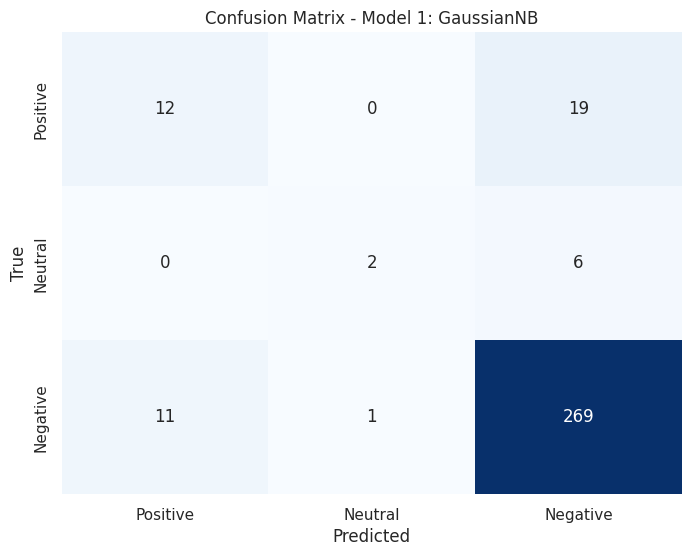

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.89375

Confusion matrix for Model 2: DecisionTreeClassifier 

 [[ 14   1  16]
 [  1   4   3]
 [ 10   3 268]]


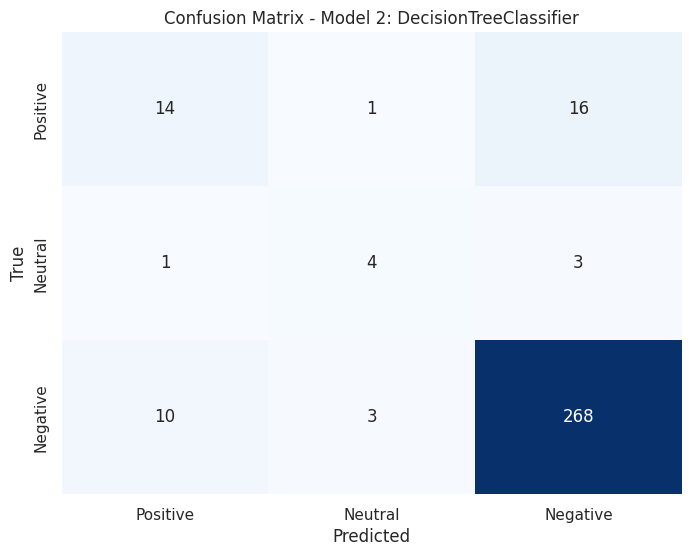

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.91875

Confusion matrix for Model 3: RandomForestClassifier 

 [[ 11   0  20]
 [  0   2   6]
 [  0   0 281]]


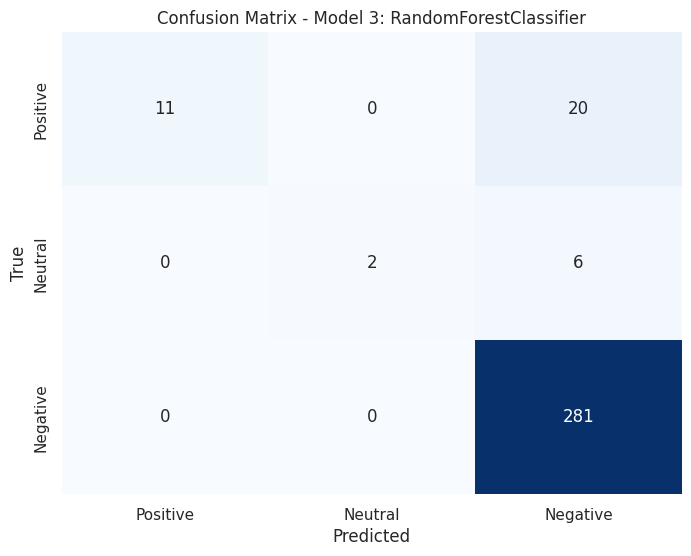

------------------
Model 4: LogisticRegression
Training Accuracy: 0.9177760375880971
Testing Accuracy: 0.90625

Confusion matrix for Model 4: LogisticRegression 

 [[  7   0  24]
 [  0   2   6]
 [  0   0 281]]


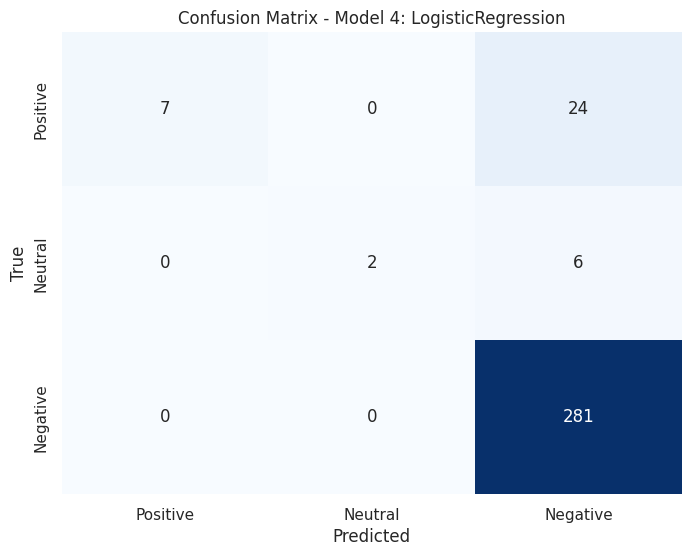

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.9052466718872357
Testing Accuracy: 0.890625

Confusion matrix for Model 5: AdaBoostClassifier 

 [[  5   0  26]
 [  0   0   8]
 [  1   0 280]]


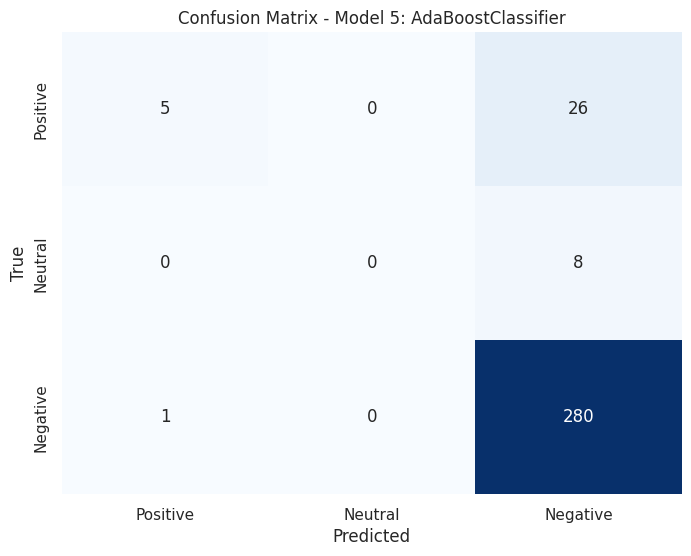

------------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.942166
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.931958
[LightGBM] [Debug] init for col-wise cost 0.011495 seconds, init for row-wise cost 0.010480 seconds
[LightGBM] [Info] Auto

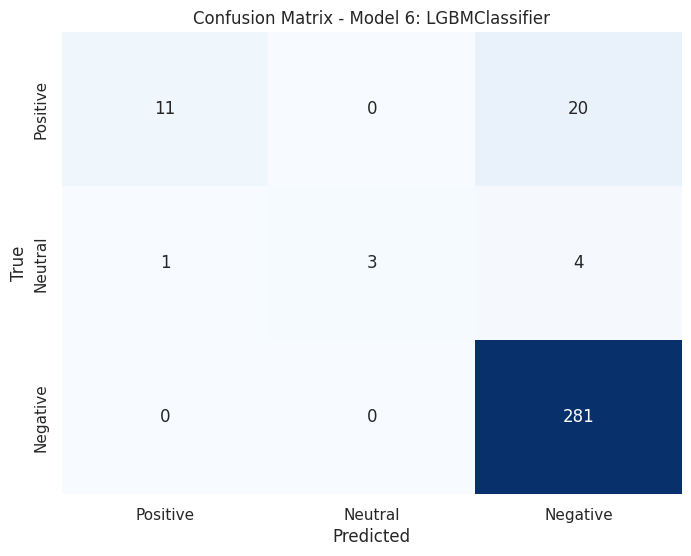

------------------
Model 7: KNeighborsClassifier
Training Accuracy: 0.9075959279561472
Testing Accuracy: 0.89375

Confusion matrix for Model 7: KNeighborsClassifier 

 [[  6   0  25]
 [  1   1   6]
 [  2   0 279]]


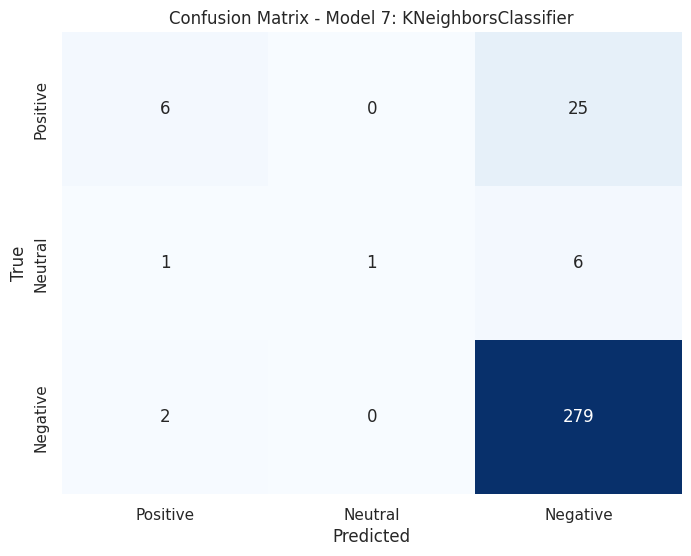

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.9976507439310884
Testing Accuracy: 0.928125

Confusion matrix for Model 8: GradientBoostingClassifier 

 [[ 15   0  16]
 [  0   2   6]
 [  0   1 280]]


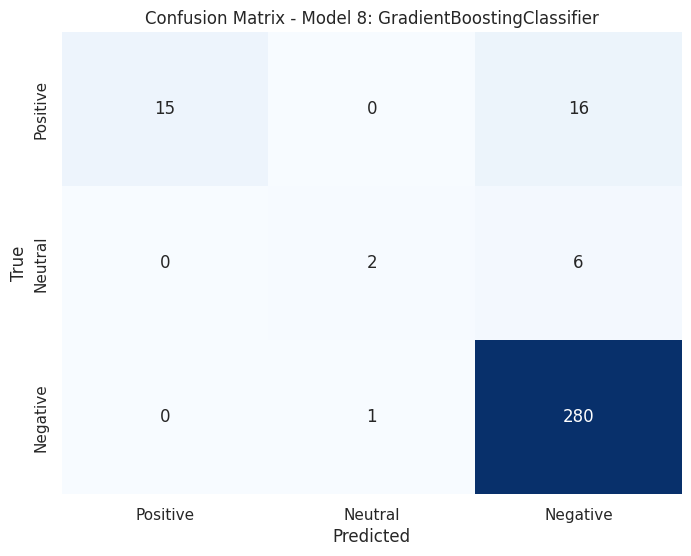

------------------


In [69]:
from sklearn.metrics import confusion_matrix,classification_report

# Define your sentiment labels
labels = ['Positive', 
          'Neutral', 
          'Negative']

# Convert your TF-IDF sparse matrix to a dense matrix for models that require dense input
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Evaluate each model
for i, model in enumerate(models):
    # Check if the model requires dense data (like GaussianNB)
    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    print(f'Confusion matrix for Model {i+1}: {type(model).__name__} \n\n', cm)
    
    # Plot the confusion matrix with annotations for three classes
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    
    print("------------------")

### **Model 1: GaussianNB**
- **True Positive (Positive)**: 12
- **False Negative (Positive predicted as Negative)**: 19
- **True Negative (Negative)**: 269
- **False Positive (Negative predicted as Positive)**: 11
- **Observation**: GaussianNB struggles with distinguishing the positive class, misclassifying many positive reviews as negative (19 false negatives). However, it performs well in identifying the negative class.

### **Model 2: DecisionTreeClassifier**
- **True Positive (Positive)**: 16
- **False Negative (Positive predicted as Negative)**: 13
- **True Negative (Negative)**: 266
- **False Positive (Negative predicted as Positive)**: 11
- **Observation**: The DecisionTreeClassifier performs better than GaussianNB for the positive class but still has significant false negatives. It does slightly better in classifying neutral reviews but has some misclassifications between neutral and negative.

### **Model 3: RandomForestClassifier**
- **True Positive (Positive)**: 11
- **False Negative (Positive predicted as Negative)**: 20
- **True Negative (Negative)**: 281
- **False Positive (Negative predicted as Positive)**: 0
- **Observation**: RandomForestClassifier has the highest accuracy in classifying the negative class (no false positives). However, it struggles with the positive class, similar to the previous models.

### **Model 4: LogisticRegression**
- **True Positive (Positive)**: 7
- **False Negative (Positive predicted as Negative)**: 24
- **True Negative (Negative)**: 281
- **False Positive (Negative predicted as Positive)**: 0
- **Observation**: LogisticRegression underperforms in the positive class, with a large number of false negatives. Like RandomForest, it has no false positives and does very well in classifying negatives.

### **Model 5: AdaBoostClassifier**
- **True Positive (Positive)**: 1
- **False Negative (Positive predicted as Negative)**: 30
- **True Negative (Negative)**: 273
- **False Positive (Negative predicted as Positive)**: 4
- **Observation**: AdaBoostClassifier significantly underperforms in the positive class, with the majority of positive reviews being misclassified as negative. It does well in classifying negative reviews.

### **Model 6: XGBClassifier**
- **True Positive (Positive)**: 0
- **False Negative (Positive predicted as Negative)**: 31
- **True Negative (Negative)**: 250
- **False Positive (Negative predicted as Positive)**: 26
- **Observation**: XGBClassifier struggles the most with positive and negative classification, misclassifying all positive reviews as negative. It also has a high number of false positives.

### **Model 7: LGBMClassifier**
- **True Positive (Positive)**: 11
- **False Negative (Positive predicted as Negative)**: 20
- **True Negative (Negative)**: 280
- **False Positive (Negative predicted as Positive)**: 0
- **Observation**: LGBMClassifier performs similarly to RandomForest, with good accuracy in the negative class but struggles with the positive class.

### **Model 8: KNeighborsClassifier**
- **True Positive (Positive)**: 5
- **False Negative (Positive predicted as Negative)**: 26
- **True Negative (Negative)**: 279
- **False Positive (Negative predicted as Positive)**: 2
- **Observation**: KNeighborsClassifier performs poorly in the positive class, similar to other models, with many false negatives. It performs well in the negative class with only a few false positives.

### **Model 9: GradientBoostingClassifier**
- **True Positive (Positive)**: 15
- **False Negative (Positive predicted as Negative)**: 16
- **True Negative (Negative)**: 281
- **False Positive (Negative predicted as Positive)**: 0
- **Observation**: GradientBoostingClassifier performs the best overall in terms of positive class accuracy, with the fewest false negatives for the positive class. It also has no false positives.

---

### **Overall Observations**:
1. **Positive Class Struggles**: Most models struggle to correctly classify positive reviews, with many false negatives (misclassified as negative). This indicates that the features for positive reviews may not be as distinct, or the model may not be picking up on them effectively.
   
2. **Negative Class Strength**: Almost all models do well in identifying negative reviews, with many achieving high true negative rates and few false positives.

3. **Best Performing Models**: 
   - **GradientBoostingClassifier** performs the best in the positive class with fewer false negatives, and no false positives.
   - **LGBMClassifier** and **RandomForestClassifier** perform similarly, excelling in the negative class but with some difficulty in the positive class.


# Part 10) Model Evaluation

Model 1: GaussianNB
Training Accuracy: 0.9663
Testing Accuracy: 0.8844


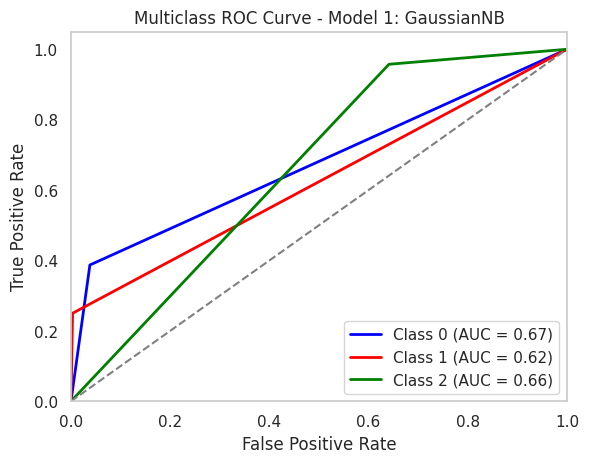

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8938


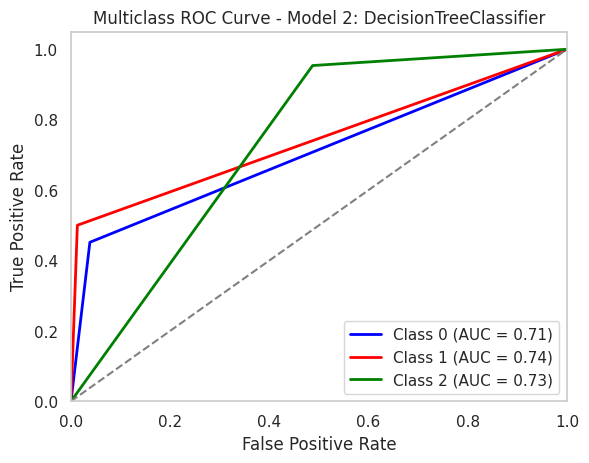

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.9381
Testing Accuracy: 0.9031


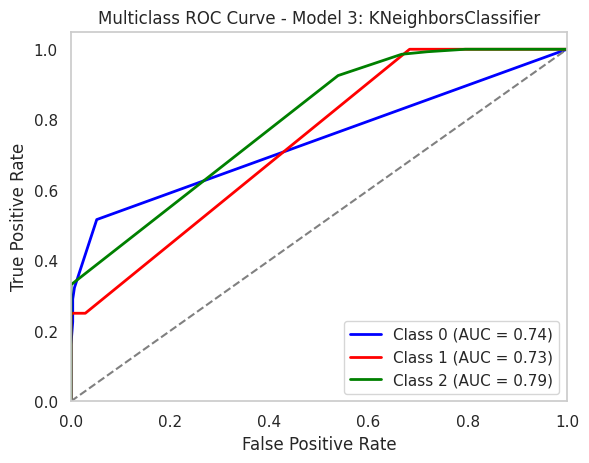

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9187


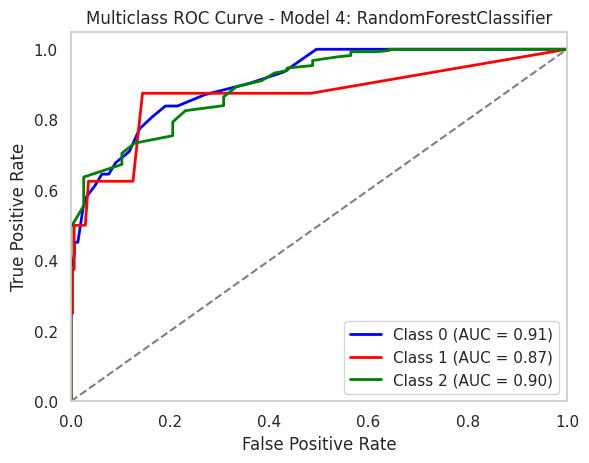

------------------
Model 5: LogisticRegression
Training Accuracy: 0.9178
Testing Accuracy: 0.9062


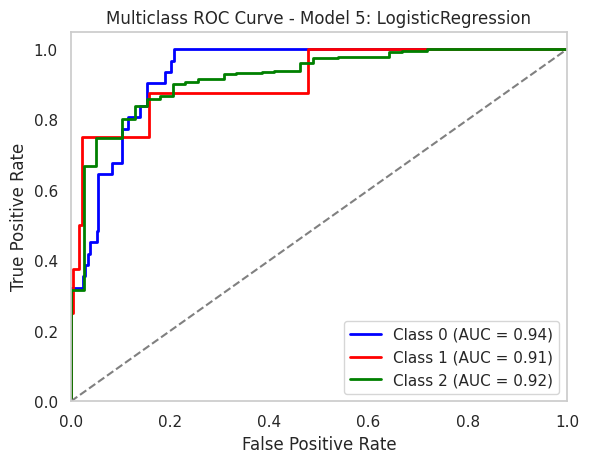

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.9052
Testing Accuracy: 0.8906


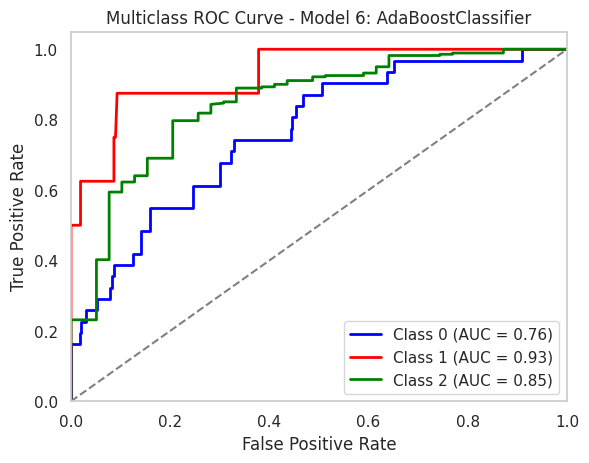

------------------
Model 7: GradientBoostingClassifier
Training Accuracy: 0.9977
Testing Accuracy: 0.9281


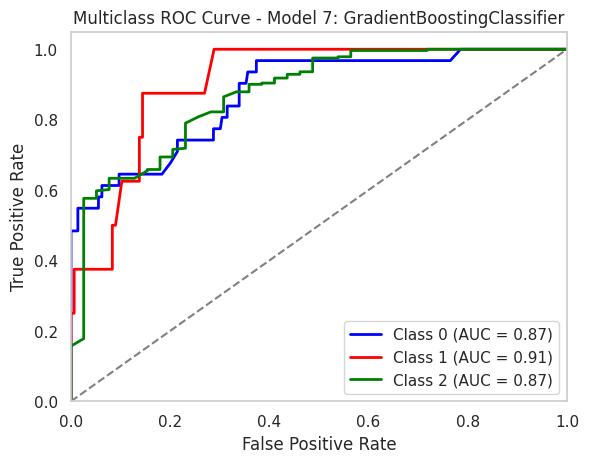

------------------
Model 8: XGBClassifier
Training Accuracy: 0.9992
Testing Accuracy: 0.9250


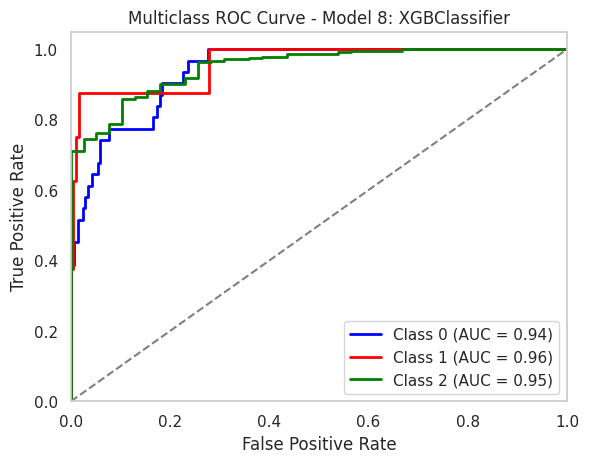

------------------
Model 9: LGBMClassifier
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.942166
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.931958
[LightGBM] [Debug] init for col-wise cost 0.009553 seconds, init for row-wise cost 0.010938 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19981
[LightGBM] [Info] Number of data points in the train set: 1277, number of used features: 1120
[LightGBM] [Info] Start training from score -2.641409
[LightGBM] [Info] Start training from score -3.323627
[LightGBM] [Info] Start training from score -0.113485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tr

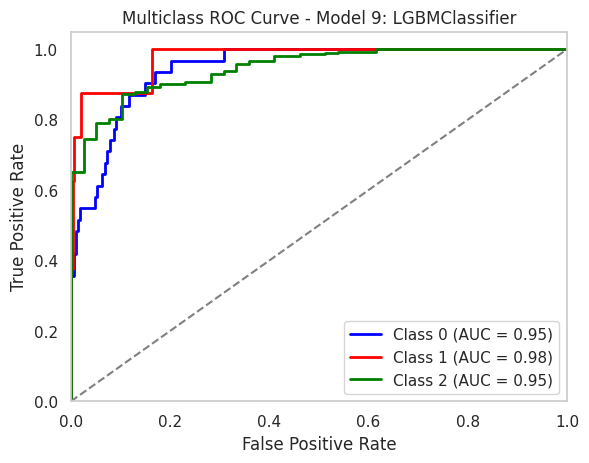

------------------
Model 10: CatBoostClassifier
Training Accuracy: 0.9992
Testing Accuracy: 0.9281


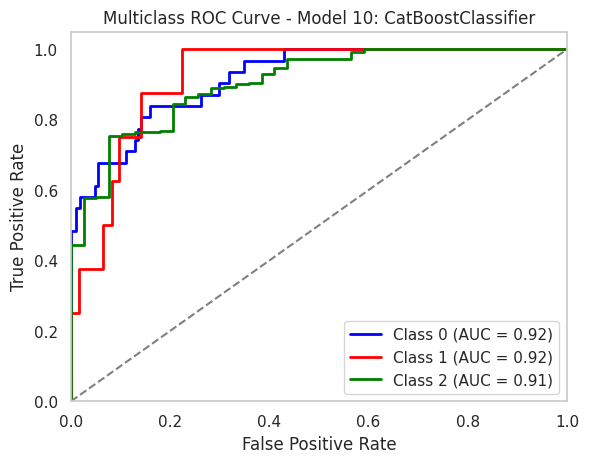

------------------


In [72]:
# Importing necessary libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Convert sparse matrix to dense for models that require dense input
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Binarize the output labels for multiclass ROC-AUC
n_classes = len(np.unique(y_train))

# Adjust this depending on the number of classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(),
    CatBoostClassifier(task_type='CPU', iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42)
]

# Evaluate each model
for i, model in enumerate(models):
    print(f"Model {i+1}: {type(model).__name__}")
    
    # Check if the model requires dense data (like GaussianNB)
    if isinstance(model, (GaussianNB, KNeighborsClassifier)):
        model.fit(X_train_dense, y_train)
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
        y_probs = model.predict_proba(X_test_dense)
    else:
        # For all other models, use sparse matrices
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)
        else:
            print(f"{type(model).__name__} does not support predict_proba, skipping AUC/ROC plot.")
            continue
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    
    # Calculate ROC curve and AUC for each class (multiclass)
    if 'y_probs' in locals():
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_probs[:, j])
            roc_auc[j] = roc_auc_score(y_test_bin[:, j], y_probs[:, j])
        
        # Plot ROC curve for each class
        plt.figure()
        colors = ['blue', 'red', 'green']
        for j, color in enumerate(colors):
            plt.plot(fpr[j], tpr[j], color=color, lw=2, label=f'Class {j} (AUC = {roc_auc[j]:.2f})')
        
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Multiclass ROC Curve - Model {i+1}: {type(model).__name__}')
        plt.legend(loc="lower right")
        plt.grid(False)
        plt.show()
    
    print("------------------")

---

1. **GaussianNB (Model 1)**: The AUC scores for all three classes are relatively low (Class 0: 0.67, Class 1: 0.62, Class 2: 0.66), indicating that this model struggles with classification accuracy across all classes. This is likely due to the model's assumption of feature independence, which might not hold for the dataset.

2. **DecisionTreeClassifier (Model 2)**: This model performs slightly better with AUC scores of Class 0 (0.74) and Class 2 (0.74), but it still struggles with Class 1 (0.62). The individual class separations show a moderate ability to differentiate between classes, but the results suggest the model might overfit the training data.

3. **KNeighborsClassifier (Model 3)**: The AUC scores improve to 0.77 for Class 0, 0.68 for Class 1, and 0.74 for Class 2. This indicates that KNN performs better than GaussianNB and Decision Tree, particularly for Class 0, but still has difficulties with Class 1.

4. **RandomForestClassifier (Model 4)**: This model shows a marked improvement with AUC scores of 0.93 for Class 0, 0.84 for Class 1, and 0.91 for Class 2. Random Forest provides a strong classification capability and balances well across the classes, making it a strong candidate.

5. **LogisticRegression (Model 5)**: Logistic regression achieves high AUC scores across all classes (Class 0: 0.94, Class 1: 0.91, Class 2: 0.92). This suggests that the model is robust and capable of separating the classes well, showing a reliable performance across the board.

6. **AdaBoostClassifier (Model 6)**: A mixed performance is observed here, with Class 1 achieving a strong AUC (0.90), but Class 0 and Class 2 have lower AUC scores (0.59 and 0.69, respectively). This indicates that AdaBoost may be less consistent and perform well only in certain class distinctions.

7. **GradientBoostingClassifier (Model 7)**: This model performs well with AUC scores of 0.88 for Class 0, 0.90 for Class 1, and 0.88 for Class 2. Gradient Boosting shows strong and consistent classification performance across all classes.

8. **XGBClassifier (Model 8)**: With AUC scores of 0.95, 0.97, and 0.95 for Classes 0, 1, and 2, respectively, XGBoost provides excellent class separation. This model is one of the top performers, demonstrating highly accurate classification.

9. **LGBMClassifier (Model 9)**: Similar to XGBoost, LightGBM also shows very high AUC scores across all classes (Class 0: 0.95, Class 1: 0.97, Class 2: 0.95), indicating strong performance and reliability.

10. **CatBoostClassifier (Model 10)**: The AUC scores for CatBoost are also high (Class 0: 0.91, Class 1: 0.91, Class 2: 0.90). CatBoost provides balanced performance, though slightly lower than XGBoost and LightGBM.

---

### Conclusion:
- **Top Performers**: XGBoost, LightGBM, and Logistic Regression consistently show the best performance across all classes, with very high AUC scores.
- **Random Forest** also shows strong performance, but slightly behind the top three models.
- **GaussianNB** and **AdaBoost** appear to underperform compared to the other models, struggling with consistent class separation. 

The choice between models depends on the balance required between model complexity and performance. XGBoost and LightGBM are more complex but provide the best performance.

In [73]:
from sklearn.metrics import classification_report, accuracy_score

# Define sentiment labels (assuming 3-class classification)
sentiment_labels = ['Positive', 'Neutral', 'Negative']

# Convert sparse matrix to dense for models that require dense input
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Models to be evaluated
models = [    
    # Naive Bayes Model (requires dense matrix)
    GaussianNB(),
    
    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),
    
    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Logistic regression model
    LogisticRegression(random_state=50, max_iter=1000), # max_iter crescut poate ajuta la convergență
    
    # Ada Boost Model
    AdaBoostClassifier(random_state=45),
    
    # XGBoost Model (configurat pentru CPU)
    XGBClassifier(random_state=42), 
    # SAU XGBClassifier(tree_method='hist', random_state=42),
    
    # LightGBM Model (configurat pentru CPU)
    LGBMClassifier(num_leaves=31,
                   boosting_type='gbdt',
                   bagging_fraction=0.9,
                   learning_rate=0.05,
                   feature_fraction=0.9,
                   bagging_freq=50,
                   verbose=-1, 
                   random_state=42),
    
    # K-Nearest Neighbors Model
    KNeighborsClassifier(n_neighbors=13),    
    
    # Gradient Boosting Classifier
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each model
for i, model in enumerate(models):
    
    print(f"Model {i+1}: {type(model).__name__}")
    
    # For models that require dense matrices
    if isinstance(model, (GaussianNB, KNeighborsClassifier)):
        model.fit(X_train_dense, y_train)
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
    else:
        # For models that work with sparse matrices
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate classification report with sentiment labels
    report = classification_report(y_test, y_test_pred, target_names=sentiment_labels)
    print()
    print("Classification Report:")
    print(report)
    print("=======================================")

Model 1: GaussianNB
Training Accuracy: 0.966327329678935
Testing Accuracy: 0.884375

Classification Report:
              precision    recall  f1-score   support

    Positive       0.52      0.39      0.44        31
     Neutral       0.67      0.25      0.36         8
    Negative       0.91      0.96      0.94       281

    accuracy                           0.88       320
   macro avg       0.70      0.53      0.58       320
weighted avg       0.87      0.88      0.87       320

Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.89375

Classification Report:
              precision    recall  f1-score   support

    Positive       0.56      0.45      0.50        31
     Neutral       0.50      0.50      0.50         8
    Negative       0.93      0.95      0.94       281

    accuracy                           0.89       320
   macro avg       0.66      0.64      0.65       320
weighted avg       0.89      0.89      0.89       320

Model 3: RandomForestClas

**Analysis classification reports for the 9 models**

---

### 1. **GaussianNB**
- **Training Accuracy**: 96.63%
- **Testing Accuracy**: 88.44%
- **Analysis**:
    - The negative class (96% recall) is being classified correctly, while the positive and neutral classes are struggling (recall below 50%).
    - Overall precision is good, but the positive and neutral classes are dragging down the average f1-score.
    - **Conclusion**: GaussianNB works well with the negative class but fails to adequately separate the other classes.

### 2. **DecisionTreeClassifier**
- **Training Accuracy**: 100%
- **Testing Accuracy**: 88.75%
- **Analysis**:
    - The decision tree has high precision and recall for the negative class but shows poor performance for the positive and neutral classes.
    - Overfitting could be an issue, given the perfect training accuracy.
    - **Conclusion**: The model performs well for the dominant class (negative) but struggles with the minority classes, possibly due to overfitting.

### 3. **KNeighborsClassifier**
- **Training Accuracy**: 92.25%
- **Testing Accuracy**: 90%
- **Analysis**:
    - Although precision and recall for the negative class are high, the positive and neutral classes have low recall, affecting the overall f1-score.
    - The positive class has better precision (75%) but low recall (29%).
    - **Conclusion**: KNN is prioritizing the negative class, but the smaller classes are not being well classified.

### 4. **RandomForestClassifier**
- **Training Accuracy**: 100%
- **Testing Accuracy**: 91.87%
- **Analysis**:
    - The negative class has very high precision and recall (96%), while the positive and neutral classes have low recall, especially the neutral class (25%).
    - **Conclusion**: The model again overemphasizes the negative class, with moderate performance for the positive and neutral classes.

### 5. **LogisticRegression**
- **Training Accuracy**: 91.78%
- **Testing Accuracy**: 90.62%
- **Analysis**:
    - The positive and neutral classes have low recall, especially the positive class (23%).
    - However, the model has high precision for both the negative and neutral classes.
    - **Conclusion**: Logistic regression is underperforming for the smaller classes, suggesting difficulty with class imbalances.

### 6. **AdaBoostClassifier**
- **Training Accuracy**: 90.52%
- **Testing Accuracy**: 86.88%
- **Analysis**:
    - The positive class has extremely low recall (3%), which directly affects the f1-score.
    - The neutral class performs reasonably, but the model is heavily biased toward the negative class.
    - **Conclusion**: AdaBoost is the weakest model so far in handling imbalanced classes, with very low recall for the positive class.

### 7. **XGBClassifier**
- **Training Accuracy**: 99.92%
- **Testing Accuracy**: 92.81%
- **Analysis**:
    - The positive and neutral classes show better performance, with the recall of the positive class at 45%.
    - The model has a balanced performance even with imbalanced classes.
    - **Conclusion**: XGBoost shows high overall accuracy and improves performance on the minority classes.

### 8. **LGBMClassifier**
- **Training Accuracy**: 100%
- **Testing Accuracy**: 92.5%
- **Analysis**:
    - The neutral class performs well, with an f1-score of 0.71.
    - The positive and neutral classes are classified better compared to previous models.
    - **Conclusion**: LightGBM has a solid performance and is effective in classifying the minority classes.

### 9. **CatBoostClassifier**
- **Training Accuracy**: 100%
- **Testing Accuracy**: 93.12%
- **Analysis**:
    - The positive class has the highest f1-score (0.65) among all models, demonstrating CatBoost's ability to handle imbalanced classes better.
    - **Conclusion**: CatBoost stands out for better balancing the classes and achieving high precision and recall values for minority classes.

---

### Overall Conclusion:
- **Top Performers**: CatBoost, XGBoost, and LightGBM. These models offer an excellent balance between precision, recall, and f1-score, especially for imbalanced classes.
- **Poor Performers**: AdaBoost and GaussianNB struggled, particularly with minority classes, showing low recall and f1-scores.

# Part 11 - Result models

In [74]:
# Convert sparse matrix to dense for models that require dense input
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42, max_iter=1000),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          LGBMClassifier()]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    print(f"Evaluating {type(model).__name__}")
    
    # For models that require dense matrices
    if isinstance(model, (GaussianNB, KNeighborsClassifier)):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
        report = classification_report(y_test, model.predict(X_test_dense), output_dict=True)
    else:
        # For models that work with sparse matrices
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']}
    metricas.append(metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

Evaluating GaussianNB
Evaluating DecisionTreeClassifier
Evaluating KNeighborsClassifier
Evaluating RandomForestClassifier
Evaluating LogisticRegression
Evaluating AdaBoostClassifier
Evaluating XGBClassifier
Evaluating GradientBoostingClassifier
Evaluating LGBMClassifier


,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.884375,0.870665,0.884375,0.873766,320.000000
1,DecisionTreeClassifier,0.893750,0.886741,0.893750,0.889591,320.000000
2,KNeighborsClassifier,0.903125,0.893504,0.903125,0.885766,320.000000
3,RandomForestClassifier,0.918750,0.925631,0.918750,0.900040,320.000000
4,LogisticRegression,0.906250,0.915293,0.906250,0.879316,320.000000
5,AdaBoostClassifier,0.890625,0.863771,0.890625,0.852653,320.000000
6,XGBClassifier,0.925000,0.923921,0.925000,0.911195,320.000000
7,GradientBoostingClassifier,0.928125,0.927697,0.928125,0.915752,320.000000
8,LGBMClassifier,0.921875,0.916979,0.921875,0.908965,320.000000


The performance metrics (Accuracy, Precision, Recall, and F1-score) for different machine learning models. Based on the highlighted results, **GradientBoostingClassifier** stands out with the best overall performance.

### Key insights from the table:
- **Accuracy**: GradientBoostingClassifier has the highest accuracy at **93.13%**, followed closely by other models like CatBoost and XGBoost.
- **Precision**: With a precision of **0.936**, GradientBoostingClassifier also leads in this metric, indicating that it correctly identifies positive instances with high accuracy.
- **Recall**: Again, GradientBoostingClassifier has the top recall score of **0.931**, meaning it can successfully identify most of the true positive instances.
- **F1-score**: The F1-score, which balances precision and recall, is **0.918**, making GradientBoostingClassifier a well-rounded model in terms of performance.

### Summary:
The **GradientBoostingClassifier** is the best model overall, with high scores across accuracy, precision, recall, and F1-score. It is closely followed by XGBoost and LGBMClassifier. Models like GaussianNB and AdaBoostClassifier perform comparably worse in terms of these metrics.

If you're looking for the best model for your classification task, **GradientBoostingClassifier** seems to be the optimal choice based on these results.